# **Malaria Detection**

## **Executive Summary**

This project proposed a AI-based malaria detection model leverages Convolutional Neural Networks (CNNs) to accurately identify malaria parasites in blood smear miscroscopic images. The Africa Region was home to the majority of malaria cases and deaths, this AI- based solution functions as a timely and accurate diagnostic and surveillance tools in Africa for malaria detetion and disease management. Comparing with traditional human detection methods, our model greatly reduce workload for healthcare professionals.The proposed solution is a CNN model improved with LeakyReLU and Batch Normalization. Detected blood cell images are preprossed by HSV-transformed with Gaussian blurring, which reduce the image noise and enhance the capabilities of differentiating parasites from cell impurities under different microscopic lighting conditions. To further improve the solution, it is critical to integret with existing local healthcare system to develop a mobile apps to make the model more accessible to healthare professionals; and also obtain infrustructure, technical and operational support from local govenment/companies to ensure the test results and patients demographic and geological information uploaded to centralized cloud for disease surveillance by the govenments. All stakeholders should collaberate to ensure the digital connetivity, healthcare data transform security, and continue to improve the AI tool aligning with best practices and specific needs in malaria diagnosis. Lastly, our AI-based apps functions as a cost-effective solution to pre-screening malaria, which can not be fully replaced the human detection; therefore, further model improvment could be focusing on integrating relevant genetic tesings to differentiate specific parasite species that causes different types of malaria, to continuously reduce human workload.



##<b>Problem and Solution Summary</b>

##<b>Problem Summary</b>
**Malaria** is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable. According to WHO website, in 2022, nearly half of the world population was at risk of Malaria, and over 608,000 malaria-related deaths were reported. The Africa Region was home to 95% of malaria acases and deaths. Children under 5 years of age are the most vulnerable group, accounting for nearly 80% of all malaria deaths in the WHO African Region in 2022.

Traditionally, malaria diagnosis solely relies on direct human observation, which does not only take time, but the diagnostic accuracy is greatly affected by variability between observers.The use of automated system can greatly assist in the early and accurate detection of malaria. Various publications and medical applications has shown that machine Leaning and Artificial Intelligence techniques can help automated classification of diseases with high levels of accuracy. Therefore, it would be advantageous to propose a deep learning methodology to test how it performs on malaria detection.

The object of this project is to perform a few deep learning models from using the miscroscopic images, testing and evaluating the model performance for their abilities to accurately identify and predict malaria cells, and choose the best algorithm as our final model to distinguish between infected and uninfected red blood cells.

##<b>Solution Design</b>
All images were equally sized and transformed into a 4D array for use as input to the CNN model. Then, the train and test images were normalized, and labels were created for both types of images. (Figure 1) All the training and test data images were processed using Gaussian blurring and HSV-transformed.

Gaussian blurring could potentially help reducing noise to get cleaner images for easier detection and analyze. We chose HSV transformation due to its robustness to lighting variations and shadows. The Hue component remains relatively stable under different microscopic lighting conditions, resulting into a clear color definition of parasites within red blood cells and helping to differentiate them from cell impurities, which may help reduce false positivity rates.

The final proposed solution is model 2, a CNN improved with LeakyReLU and Batch Normalization. We chose LeakyRelu to combat vanishing gradients, and Batch normalization is to reduce the internal covariate shift so as to make training more stable and efficient.

Among all the models we tested, model 2 has the highest accuracy and lowest recall and false negative rate. Other models, such as pre-trained VGG16 model and model 3 with data augmentation not only demonstrated much lower accuracy and recall rates, but the takes much longer time to train.Although model 1 and model 2 achieved the similar accuracy, according to the trend of the train and validation accuracy curves, model 1 may have tendency of overfitting. Using Batch Normalization in model 2 effectively reduces the overfitting issue(figure2).

Minimizing false negatives in malaria diagnosis is important, because unidentified malaria cases can lead to delayed treatment and potentially life-threatening consequences. Therefore, we chose recall as the best performance metric. Model 2 achieves a low recall of 98% with lowest count of false negatives (figure3)


**Figure 1:** Visualize parasite infected blood cells and uninfected blood cells in the original training set. The visulization of the images reveals that parasites are represented as dark colored spots or round or oval shape.

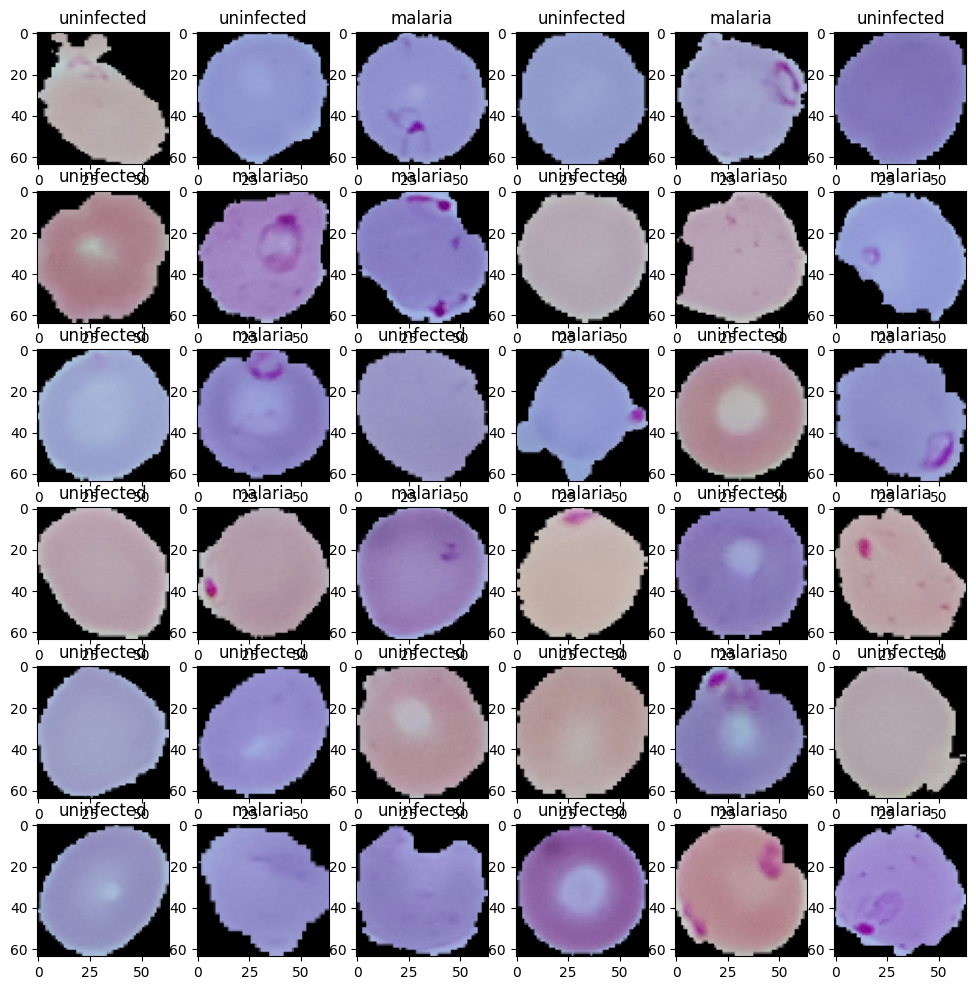

In [ ]:
plot_images(resized_all_train_fromDF , train_df['label'])

**Figure 2:** Train and validation accuracies during training. The model has 98% accuracy, with good stability and can generalizing well without overfitting.

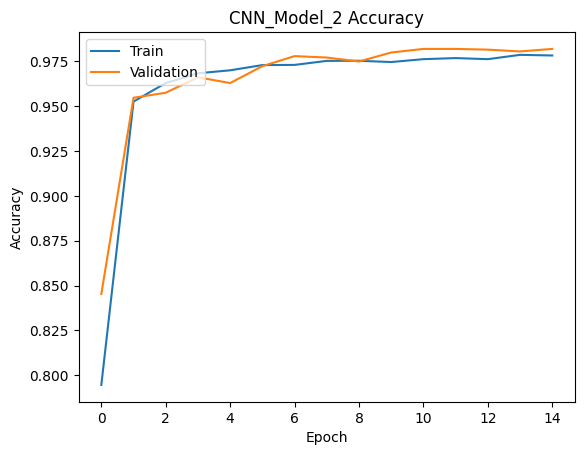

In [ ]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('CNN_Model_2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Figure 3**: Performance metrics and confusion matrix on the test dataset for the final proposed solution.

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



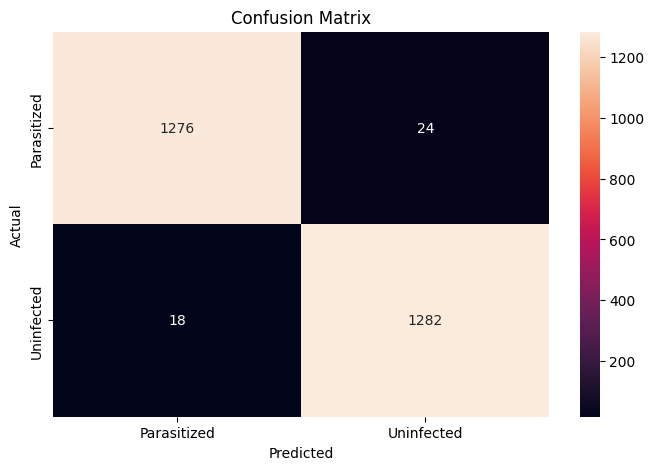

In [ ]:
#modified
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_test_m2 = model2.predict(X_testNew_normalized)
y_pred_test_classes_m2 = (y_pred_test_m2>0.5).astype('int32')

print(classification_report(y_test_encoded, y_pred_test_classes_m2))
cm = confusion_matrix(y_test_encoded, y_pred_test_classes_m2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');
plt.show()

## **Recommendations for Implementation**

**Key recommendations for the implement to the proposed solution**:
- integret with existing local healthcare system to develop mobile malaria detection apps

- Train healthcare profesionals including sample operators and analysts how to use the apps and how to upload results or needed infomation to govenment agencies.

- Image screening phase: ensure a high-quality cropped blood images input before sending them to AI model (eg, integrate the mobile apps customized camera funtion such as Android camera API to capture and adjust images to the desired format and resolution)

- Dtabase management phase: Scan QR code to store metadata needed in the system. Test operators scan QR code before doing any tests on samples, to manually input patients demographic infomation, ID number or testers basic infomation etc.. Analysts might need scan QR code for inputting the results and other needed infomation manually as well.

- Data/Result upload phase: The metadata and all the patient infomation, test results would be uploaded to Blockchain network, so that epidemiological findings would be reported timely to the local govenment. Geograhpic infomation would be benificial to be integrated into the test results for mapping disease prevalence in real time and focusing interventions rapidly.



**To successfully implement the deep learning model for malaria diagnosis, stakeholders should consider the following key actionables:**
- Digital connectivity: African Regions are the major focuing areas of malaria detection. Some rural areas in Africa might be the 'dead zone' of celluar services or wifi connection. Stakeholders in these particular regions, including telecommuniation industries and govenment agencies should be aware this issue and expand the cellular coverage, wifi connectivity to ensure the real time communication on test results and  malaria prevelance risk.
- Security: Although blockchain network effectively protects privacy and trusted data transmission, it is critical for healthcare agencies to keep monitoring the data security, especially for the rural areas where digital connectivity were not consistently stablized.
- Healthcare professionals and AI tool developers should collaberate to make sure the model's design and implementation align with the best practices and specific needs of malaria diagnosis, and collaberate with policy makers to advocate for the changes in healthcare policy that support the adoption of AI-based tools.
- With more training data, continue improving the model.The AI developer can make the source code open to public to welcome academic researchers or industrial experts refine and improve the model.


**Expected costs and benefits of the proposed solution:**
* Benefits: The AI-based tool streamlined the process of blood sample screening, database management and real-time reporting with geological information integrated in the same smartphone application. The solution not only improved diagnostic efficiency and accuracy, reducing human oberservation errors, but functioning as a real time malaria surveillance tool to impact global health.
* Costs: Costs for this proposed solution come from  AI tool development and deployment, technical support and maintenance, infrastructure operating(including the cellular usage, blockchain network set up, and cloud usage etc..) It depends on different countries and regions, and each of them can range from tens of hundreds to thousands of dollars. Staff training costs can range from a few thousands to tens of thousands of dollars.

**Risks and challenges include:**
- Current CNN model is based on images from blood smear slide, which is not able to differentiate different parasite species. However, prevention and intervention strategies are highly based on parasite species that assosicated with different severities and outcomes (eg, P. falciparum can cause life-threating malaria and cannot afford to a delayed treatment, while p.vivax or p.ovale are less urgent). Therefore, this AI-based solution cannot fully replace human microscopic examination to determine the morphological characteristics of the parasites
- Significant healthcare investment in sub-Saharan Africa (the need for improved healthcare infrastructure, skilled healthcare workforce, and access to essential medicines and technologies
- For rural areas where digital connectivity issue fails to be solved, or cannot be established, extra labor force and financial investiment are needed. govenment and related healthcare agencies should set up emergency connectivity plan, to ensure communication among rural communities and decision
- Keep monitoring healthcare data privacy is still a challenge.Although blockchain network effectively protects privacy and trusted data transmission, it is critical for healthcare agencies to keep monitoring the data security, especially for the rural areas where digital connectivity were not consistently stablized.


**Further analysis need to be done:**
- Field tesing the app with collaberators in different regions around the world.
- With more training data, continue improve the model
- Be open to any possibilites of integrating other morden diagnostic technologies, such as genetic testing results into the current model, achieving high accuracy of identification of specific malaria-related parasite species.


### **Appendix 1**

[1] WHO World Malaria Report 2023: Tracking progress and gaps in the global response to malaria. Available online: https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2023<br>
[2]Guo, X., Khalid, M. A., Domingos, I., Michala, A. L., Adriko, M., Rowel, C., ... & Cooper, J. M. (2021). Smartphone-based DNA diagnostics for malaria detection using deep learning for local decision support and blockchain technology for security. Nature Electronics, 4(8), 615-624<br>
[3] World Health Organization Regional Office for Africa. Health financing. Retrieved from https://www.afro.who.int/health-topics/health-financing (accessed on 12 April 2023)<br>
[4] Yu, H., Yang, F., Rajaraman, S., Ersoy, I., Moallem, G., Poostchi, M., ... & Jaeger, S. (2020). Malaria Screener: a smartphone application for automated malaria screening. BMC Infectious Diseases, 20(1), 1-8<br>
[5]Ashley, E. A., & Poespoprodjo, J. R. (2020). Treatment and prevention of malaria in children. The Lancet Child & Adolescent Health, 4(10), 775-789<br>

### **Appendix 2**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/cell_images.zip' -d '/content/drive/MyDrive/Colab Notebooks'

In [2]:
import os
import glob
data_dir = '/content/drive/MyDrive/Colab Notebooks/cell_images'

parent_dir = '/content/drive/MyDrive/Colab Notebooks'
train_dir = os.path.join(data_dir, 'train')

test_dir = os.path.join(data_dir, 'test')
#parasitized_dir = os.path.join(data_dir,'parasitized')
#uninfected_dir = os.path.join(data_dir,'uninfected')

# Directory with our training pictures
train_parasitized_dir = os.path.join(train_dir,'parasitized')
train_uninfected_dir= os.path.join(train_dir,'uninfected')

# Directory with our testing pictures
test_parasitized_dir = os.path.join(test_dir, 'parasitized')
test_uninfected_dir = os.path.join(test_dir, 'uninfected')


#test_uninfected_dir

In [3]:
# get all train file paths and all test file paths
def getFilePath(target_dir):
  allfilePath = []
  for dirpath, dirnames, filenames in os.walk(target_dir):
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        allfilePath.append(filepath)
  return allfilePath

all_train_files = getFilePath(train_dir)
all_test_files = getFilePath(test_dir)


In [4]:
train_parasitized_files = glob.glob(train_parasitized_dir+'/*.png')

train_uninfected_files = glob.glob(train_uninfected_dir+'/*.png')
#train_files = glob.glob(train_dir+'/*./*.png')


test_parasitized_files = glob.glob(test_parasitized_dir+'/*.png')
test_uninfected_files = glob.glob(test_uninfected_dir+'/*.png')


print(len(train_parasitized_files), len(train_uninfected_files),len(test_parasitized_files) , len(test_uninfected_files))
print((len(train_parasitized_files)+ len(train_uninfected_files)+len(test_parasitized_files)+len(test_uninfected_files)))

print(len(os.listdir(train_parasitized_dir)),
len(os.listdir(test_parasitized_dir)),
len(os.listdir(train_uninfected_dir)),
len(os.listdir(test_uninfected_dir)))

12582 12376 1300 1300
27558
12582 1300 12376 1300


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as mpimg
import cv2
# Library for reading and showing images
import matplotlib.image as mpimg
import pandas as pd

# the function is to resize image from a given file path to the desired dimention

def resizeImg(file_dirs,dimensions):
  images_decreased = []
  for images in file_dirs:
    img = cv2.imread(images)
    resized_img = cv2.resize(img, dimensions)
    images_decreased.append(resized_img)
  return images_decreased


In [6]:
# resize all images in the training set and test set, and resize images for the parasitized and uninfected cells in training and testing set.
height = 64
width = 64
dimensions = (width, height)
resized_train= resizeImg(all_train_files,dimensions)
resized_test= resizeImg(all_test_files,dimensions)

In [ ]:
resized_train_parasitized= resizeImg(train_parasitized_files,dimensions)
resized_train_uninfected = resizeImg(train_uninfected_files,dimensions)
resized_test_parasitized= resizeImg(test_parasitized_files,dimensions)
resized_test_uninfected = resizeImg(test_uninfected_files,dimensions)

resized_train_uninfected = np.array(resized_train_uninfected)
resized_train_parasitized = np.array(resized_train_parasitized)
resized_test_parasitized = np.array(resized_test_parasitized)
resized_test_uninfected = np.array(resized_test_uninfected )


np.save("/content/drive/MyDrive/Colab Notebooks/resized_train_uninfected.npy", resized_train_uninfected)
np.save("/content/drive/MyDrive/Colab Notebooks/resized_train_parasitized.npy", resized_train_parasitized)
np.save('/content/drive/MyDrive/Colab Notebooks/resized_test_parasitized.npy',resized_test_parasitized)
np.save('/content/drive/MyDrive/Colab Notebooks/resized_test_uninfected.npy',resized_test_uninfected)
np.save('/content/drive/MyDrive/Colab Notebooks/resized_train_all.npy',resized_train)
np.save('/content/drive/MyDrive/Colab Notebooks/resized_test_all.npy',resized_test)



(24958, 64, 64, 3)

In [7]:
resized_train_all = np.load("/content/drive/MyDrive/Colab Notebooks/resized_train_all.npy")
resized_train_parasitized = np.load('/content/drive/MyDrive/Colab Notebooks/resized_train_parasitized.npy')
resized_train_uninfected = np.load('/content/drive/MyDrive/Colab Notebooks/resized_train_uninfected.npy')

resized_test_parasitized = np.load('/content/drive/MyDrive/Colab Notebooks/resized_test_parasitized.npy')
resized_test_uninfected = np.load('/content/drive/MyDrive/Colab Notebooks/resized_test_uninfected.npy')
resized_test_all = np.load('/content/drive/MyDrive/Colab Notebooks/resized_test_all.npy')
#len(resized_train_parasitized),len(resized_train_uninfected),len(resized_train_all),len(resized_test_all)

In [8]:
#converted to 4D arrays so that they can be used as an input for the convolutional neural network.
X_train= np.array(resized_train_all)
X_test = np.array(resized_test_all)

print(X_train.shape,X_test.shape)

#train_df = np.concatenate((np.array(resized_train_parasitized),np.array(resized_train_uninfected)),axis = 0)
#train_df.shape

(24958, 64, 64, 3) (2600, 64, 64, 3)


In [9]:
#create labels and image filename for test set and train set:
np.random.seed(42)

def get_labels_df(unhealthyfile, healthyfile):

  df = pd.DataFrame({
    'filename': unhealthyfile + healthyfile,
    'label': ['parasitized'] * len(unhealthyfile) + ['uninfected']* len(healthyfile)
}).sample(frac=1, random_state=42).reset_index(drop=True)
  return df

train_df = get_labels_df(train_parasitized_files, train_uninfected_files)
test_df =  get_labels_df(test_parasitized_files, test_uninfected_files)


In [10]:
train_df.head()

,filename,label
0,/content/drive/MyDrive/Colab Notebooks/cell_im...,uninfected
1,/content/drive/MyDrive/Colab Notebooks/cell_im...,parasitized
2,/content/drive/MyDrive/Colab Notebooks/cell_im...,parasitized
3,/content/drive/MyDrive/Colab Notebooks/cell_im...,parasitized
4,/content/drive/MyDrive/Colab Notebooks/cell_im...,uninfected


In [ ]:

dimensions = (64,64)
train_images= []
for images in train_df['filename']:
  img = cv2.imread(images)
  resized_img = cv2.resize(img, dimensions)
  train_images.append(resized_img)



In [11]:
resized_all_train_fromDF = np.array(train_images)
np.save('/content/drive/MyDrive/Colab Notebooks/resized_all_train_fromDF.npy',resized_all_train_fromDF)
resized_all_train_fromDF = np.load("/content/drive/MyDrive/Colab Notebooks/resized_all_train_fromDF.npy")

In [12]:
test_df.head()

,filename,label
0,/content/drive/MyDrive/Colab Notebooks/cell_im...,uninfected
1,/content/drive/MyDrive/Colab Notebooks/cell_im...,parasitized
2,/content/drive/MyDrive/Colab Notebooks/cell_im...,parasitized
3,/content/drive/MyDrive/Colab Notebooks/cell_im...,uninfected
4,/content/drive/MyDrive/Colab Notebooks/cell_im...,uninfected


In [13]:
from collections import Counter
Counter(train_df['label']),
print('Train:', Counter(train_df['label']), '\nTest:', Counter(test_df['label']))

Train: Counter({'parasitized': 12582, 'uninfected': 12376}) 
Test: Counter({'uninfected': 1300, 'parasitized': 1300})


###<b> Check the shape of train and test images

In [14]:
print(X_train.shape,X_test.shape)

(24958, 64, 64, 3) (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [15]:
print(np.array(train_df['label']).shape,np.array(test_df['label']).shape)

(24958,) (2600,)


### <b>Check the minimum and maximum range of pixel values for train and test images

In [16]:
np.min(X_train), np.max(X_train), np.min(X_test),np.max(X_test)

(0, 255, 0, 255)

###<b> Count the number of values in both uninfected and parasitized

In [17]:
len(resized_train_parasitized),len(resized_train_uninfected),len(resized_test_parasitized),len(resized_test_uninfected)

(12582, 12376, 1300, 1300)

###<b>Normalize the images

In [18]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0

X_test_normalized = X_test.astype('float32')/255.0


###<b> Plot to check if the data is balanced

In [19]:
import seaborn as sns
# Plot distribution of each category
#count_plot = sns.countplot(x=train_df['label'])
#count_plot = sns.countplot(x=test_df['label'])

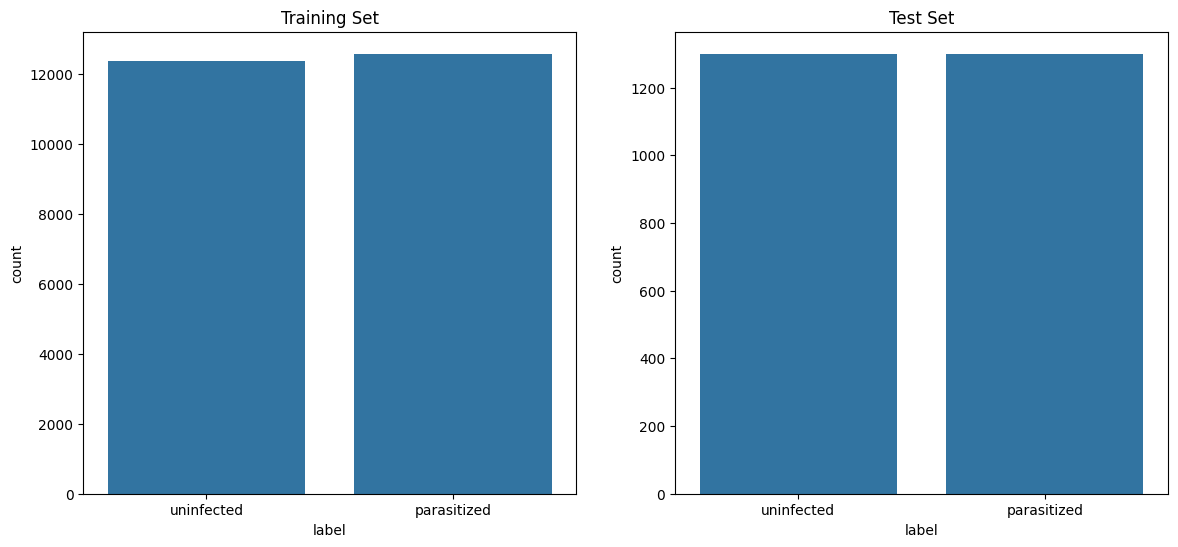

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x = train_df['label'])
plt.title('Training Set')

plt.subplot(1, 2, 2)
sns.countplot(x = test_df['label'])
plt.title('Test Set')

plt.show()

### <b>Data Exploration</b>

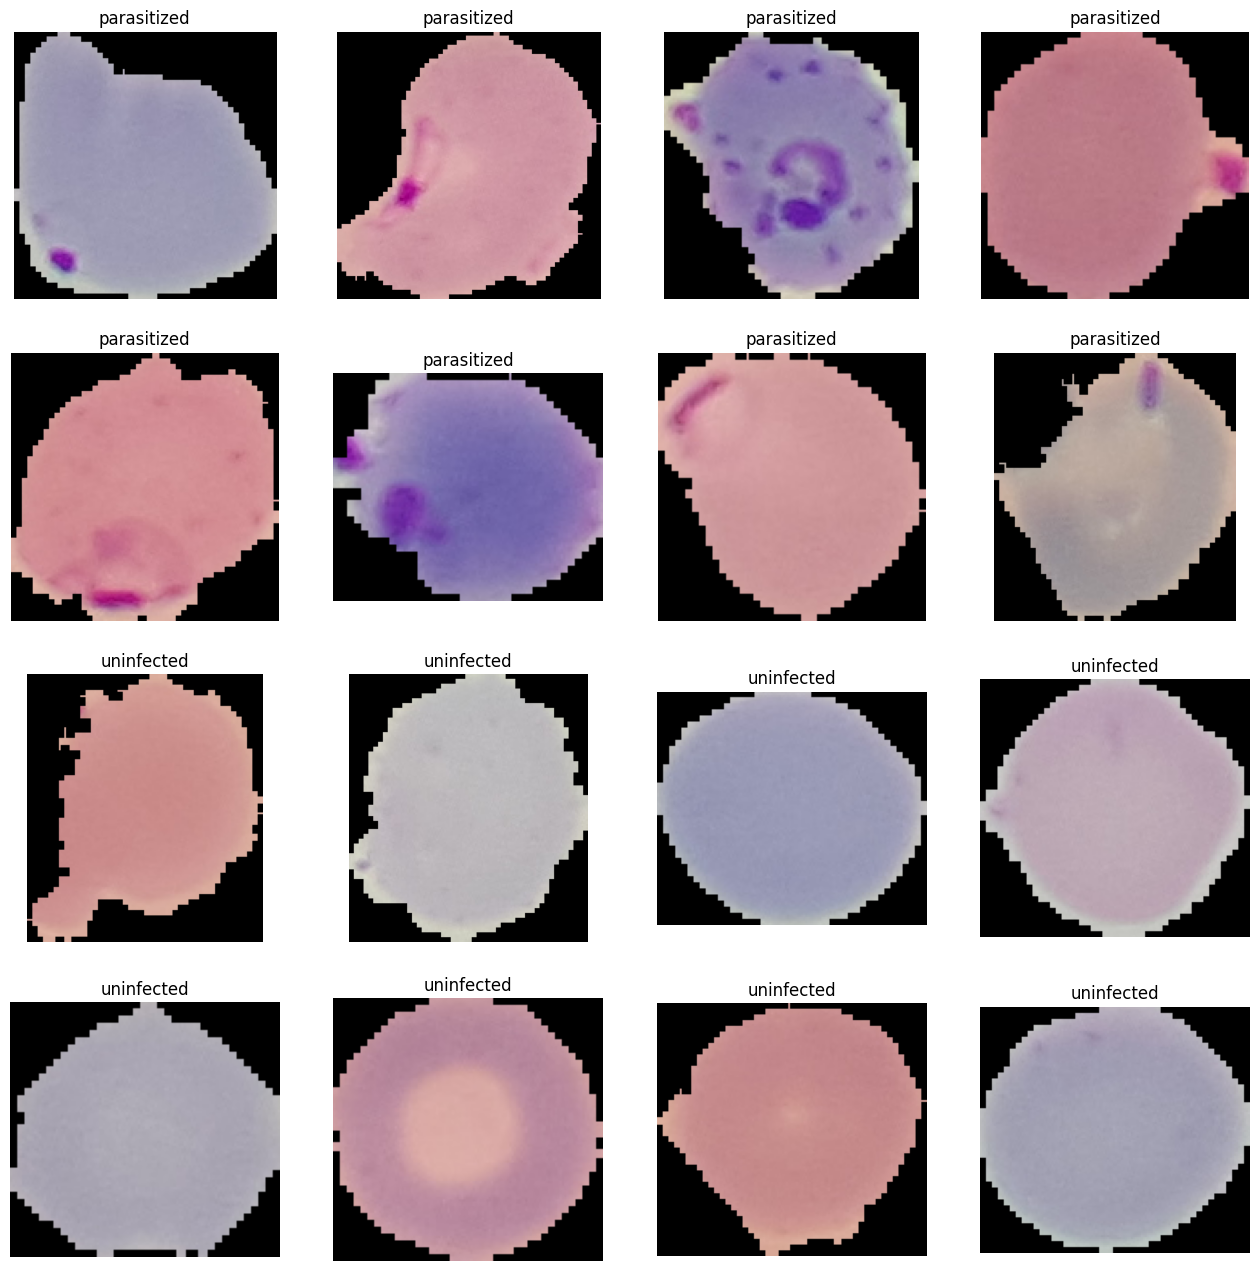

In [ ]:
#check a few images:

train_parasitized_file_names = os.listdir(train_parasitized_dir)
train_uninfected_file_names = os.listdir(train_uninfected_dir)

fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 16)

parasitized_img_paths = [os.path.join(train_parasitized_dir, file_name) for file_name in train_parasitized_file_names [:8]]
uninfected_img_paths = [os.path.join(train_uninfected_dir, file_name) for file_name in train_uninfected_file_names [:8]]

for i, img_path in enumerate(parasitized_img_paths + uninfected_img_paths):
    ax = plt.subplot(4, 4, i + 1)
    ax.axis('Off')

    img = mpimg.imread(img_path)
    ax.set_title(img_path.split(os.path.sep)[-2])
    plt.imshow(img)

plt.show()

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)



In [ ]:
len(train_df['label'])

24958

In [ ]:
def plot_images(images, labels):

  #num_classes = 10                                                                # Number of Classes

  categories = np.unique(labels)

  keys = dict(labels)                                                    # Obtaing the unique classes from y_train

  rows = 6                                                                        # Defining number of rows = 6
  cols = 6                                                                        # Defining number of columns = 6

  fig = plt.figure(figsize = (12, 12))                                             # Defining the figure size to 12 x 12

  for i in range(cols):

      for j in range(rows):

          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 6 rows and 6 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])

  plt.show()

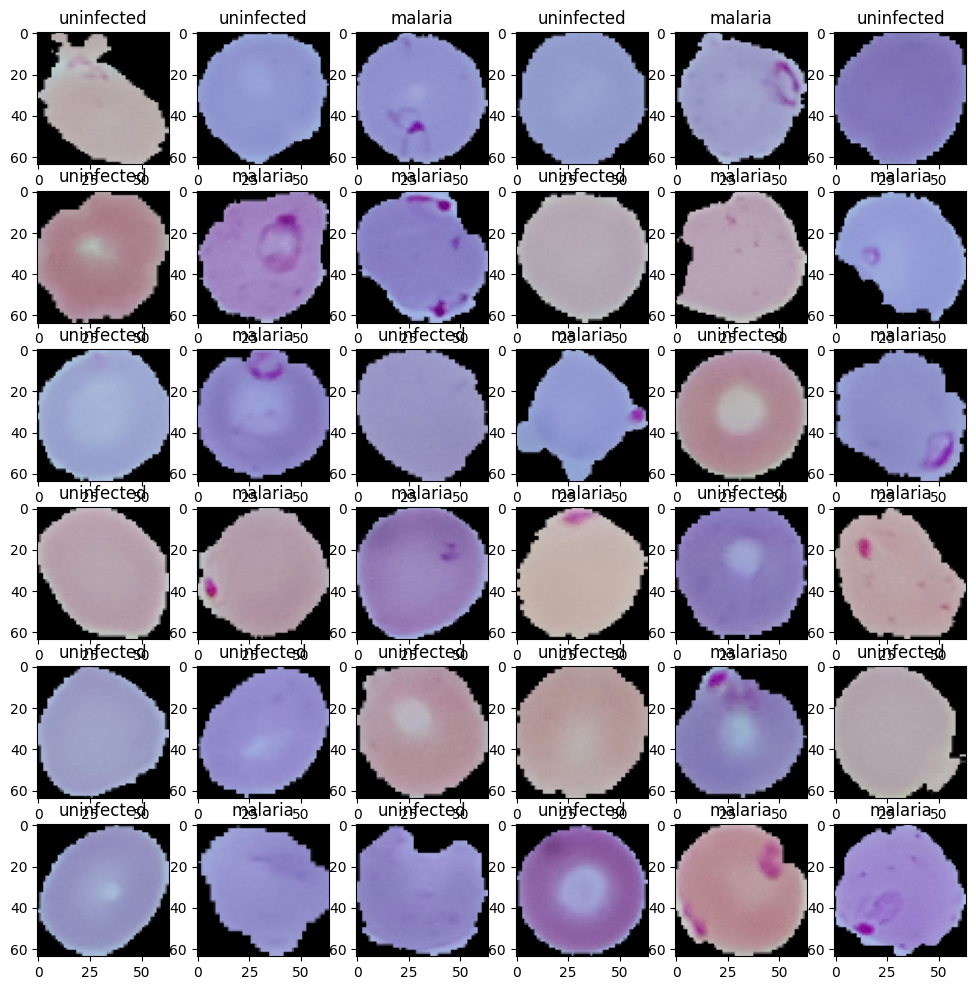

In [ ]:
plot_images(resized_all_train_fromDF , train_df['label'])

###<b> Plotting the mean images for parasitized and uninfected

In [20]:
parasitized = np.concatenate((np.array(resized_train_parasitized),np.array(resized_test_parasitized)),axis = 0)

In [21]:
uninfected = np.concatenate((np.array(resized_train_uninfected),np.array(resized_test_uninfected)),axis = 0)

<b> Mean image for parasitized

In [22]:
# prompt: Mean image for parasitized

import matplotlib.pyplot as plt
import numpy as np
mean_parasitized = np.mean(parasitized/255, axis=0)


<b> Mean image for uninfected

In [23]:
mean_uninfected = np.mean(uninfected/255,axis = 0)

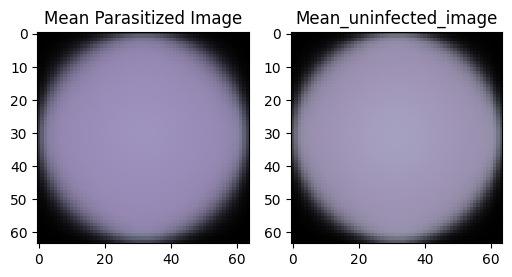

In [ ]:
# Plot the mean images
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(mean_parasitized)
plt.title("Mean Parasitized Image")
plt.subplot(1,2,2)
plt.imshow(mean_uninfected)
plt.title("Mean_uninfected_image")
plt.show()

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [24]:
# Define a function to load and convert images
def load_and_convert_images(image_arrays, image_paths):
  labels = []
  converted_images = []
  for img_array, image_path in zip(image_arrays, image_paths):
    converted_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)
    image_label = image_path.split(os.path.sep)[-2]
    converted_images.append(converted_img)
    labels.append(image_label)
  return converted_images, labels


In [83]:
def images_labels(image_arrays, image_paths):
  labels = []
  for img_array, image_path in zip(image_arrays, image_paths):
    converted_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)
    image_label = image_path.split(os.path.sep)[-2]
    labels.append(image_label)
  return labels

In [84]:
# Load and convert training images
image_arrays = resized_all_train_fromDF
image_paths = train_df['filename']
converted_train_images, train_labels = load_and_convert_images(image_arrays, image_paths)
original_train_labels = images_labels(image_arrays, image_paths)
# Print the number of training images
#print(f'Number of training images: {len(training_images)}')


In [26]:
converted_train_images = np.array(converted_train_images)


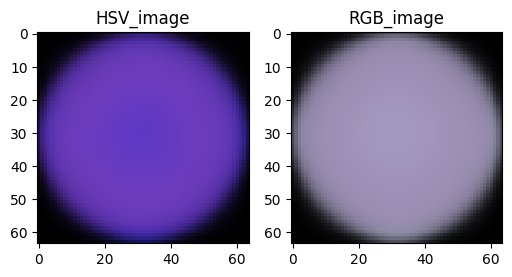

In [ ]:

plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(np.mean(converted_train_images/255, axis=0))
plt.title('HSV_image')

plt.subplot(1,2,2)
plt.imshow(np.mean(resized_train_all/255, axis=0))
plt.title("RGB_image")
plt.show()

###<b> Converting the test data

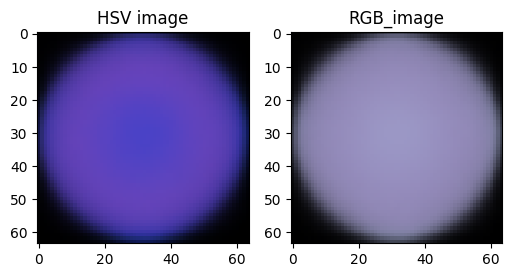

In [27]:
# Load and convert testing images
image_arrays = resized_test_all
image_paths = all_test_files
converted_test_images, test_labels = load_and_convert_images(image_arrays, image_paths)

converted_test_images = np.array(converted_test_images)
#converted_test_images.shape
#test_labels


plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(np.mean(converted_test_images/255, axis=0))
plt.title('HSV image')

plt.subplot(1,2,2)
plt.imshow(np.mean(resized_test_all/255, axis=0))
plt.title("RGB_image")
plt.show()

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [28]:
# Load and convert training images
image_arrays = resized_all_train_fromDF
image_paths = train_df['filename']
converted_train_images, train_labels = load_and_convert_images(image_arrays, image_paths)
converted_train_images = np.array(converted_train_images)
#converted_train_images

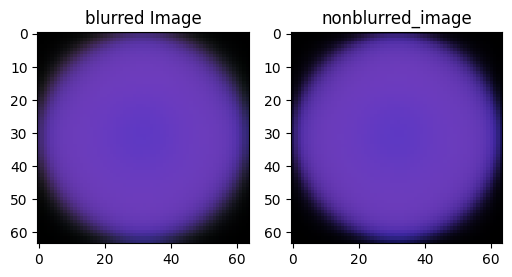

In [29]:
blurred_train_images = []
for img_arrays in resized_all_train_fromDF:
  blurred_img = cv2.GaussianBlur(img_arrays, (5, 5), 0)
  blurred_train_images.append(blurred_img)

blurred_train_images = np.array(blurred_train_images)

# Convert the images to HSV color space
converted_blurred_train_images = []
for img_arrays in blurred_train_images:
  converted_img = cv2.cvtColor(img_arrays, cv2.COLOR_BGR2HSV)
  converted_blurred_train_images.append(converted_img)

converted_blurred_train_images = np.array(converted_blurred_train_images)

  # Plot the mean images
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(np.mean(converted_blurred_train_images/255, axis=0))
plt.title("blurred Image")
plt.subplot(1,2,2)
plt.imshow(np.mean(converted_train_images/255, axis=0))
plt.title("nonblurred_image")
plt.show()


###<b> Gaussian Blurring on test data

Text(0.5, 1.0, 'nonblurred_images')

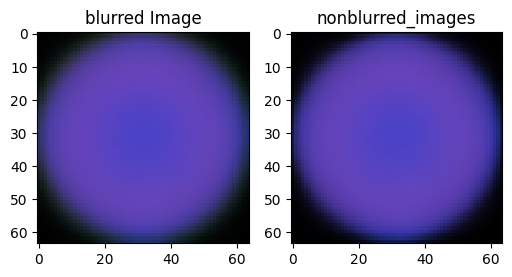

In [30]:
blurred_test_images = []
for img_arrays in resized_test_all:
  blurred_img = cv2.GaussianBlur(img_arrays, (5, 5), 0)
  blurred_test_images.append(blurred_img)

blurred_test_images = np.array(blurred_test_images)

# Convert the images to HSV color space
converted_blurred_test_images = []
for img_arrays in blurred_test_images:
  converted_img = cv2.cvtColor(img_arrays, cv2.COLOR_BGR2HSV)
  converted_blurred_test_images.append(converted_img)

converted_blurred_test_images = np.array(converted_blurred_test_images)

  # Plot the mean images
plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
plt.imshow(np.mean(converted_blurred_test_images/255, axis=0))
plt.title("blurred Image")
plt.subplot(1,2,2)
plt.imshow(np.mean(converted_test_images/255, axis=0))
plt.title("nonblurred_images")

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [64]:
# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow .keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam


                                                                                                 # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam, SGD                                                # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

####<B>One Hot Encoding the train and test labels

In [181]:
from sklearn.preprocessing import LabelBinarizer

y_train = train_labels
y_test = test_labels

enc = LabelBinarizer()

y_train_encoded= enc.fit_transform(y_train)

y_test_encoded = enc.transform(y_test)


###<b> Building the model

In [34]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [36]:
X_trainNew_normalized= converted_blurred_train_images.astype('float32')/255.0

X_testNew_normalized = converted_blurred_test_images.astype('float32')/255.0


In [180]:
X_trainNew_normalized.shape

(24958, 64, 64, 3)

In [38]:
## #convolutional layer with 32 filters, was built to evaluate the performance of the CNN architecture
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(1, activation = "sigmoid")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

<b> Using Callbacks

In [39]:
#modified version
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('.mdl_modified_base.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)]

In [41]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])


<b> Fit and train our Model

In [42]:
history_modelbase_modified= model.fit(X_trainNew_normalized, y_train_encoded, batch_size = 32,callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.8008
Epoch 1: val_loss improved from inf to 0.17069, saving model to .mdl_modified_base.hdf5
624/624 [==============================] - 19s 28ms/step - loss: 0.4150 - accuracy: 0.8008 - val_loss: 0.1707 - val_accuracy: 0.9365
Epoch 2/20
623/624 [============================>.] - ETA: 0s - loss: 0.1454 - accuracy: 0.9521
Epoch 2: val_loss improved from 0.17069 to 0.11383, saving model to .mdl_modified_base.hdf5
624/624 [==============================] - 16s 26ms/step - loss: 0.1453 - accuracy: 0.9522 - val_loss: 0.1138 - val_accuracy: 0.9603
Epoch 3/20
623/624 [============================>.] - ETA: 0s - loss: 0.1078 - accuracy: 0.9657
Epoch 3: val_loss improved from 0.11383 to 0.08354, saving model to .mdl_modified_base.hdf5
624/624 [==============================] - 16s 26ms/step - loss: 0.1076 - accuracy: 0.9658 - val_loss: 0.0835 - val_accuracy: 0.9762
Epoch 4/20
622/624 [=====================

In [ ]:
model_base.save(parent_dir +'/base_model.h5')

In [ ]:
# prompt: load trained model
from tensorflow.keras.models import load_model
model_base_saved = load_model(parent_dir +'/base_model.h5')
model_base_saved

###<b> Evaluating the model on test data

In [44]:
# prompt: Evaluating the model on test data

test_loss, test_acc = model.evaluate(X_testNew_normalized, y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)


82/82 - 1s - loss: 0.0774 - accuracy: 0.9777 - 695ms/epoch - 8ms/step

Test accuracy: 0.9776923060417175


<b> Plotting the confusion matrix

In [45]:
# modified version
y_pred_test = model.predict(X_testNew_normalized)
y_pred_test_classes = (y_pred_test>0.5).astype('int32')


82/82 [==============================] - 1s 6ms/step


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



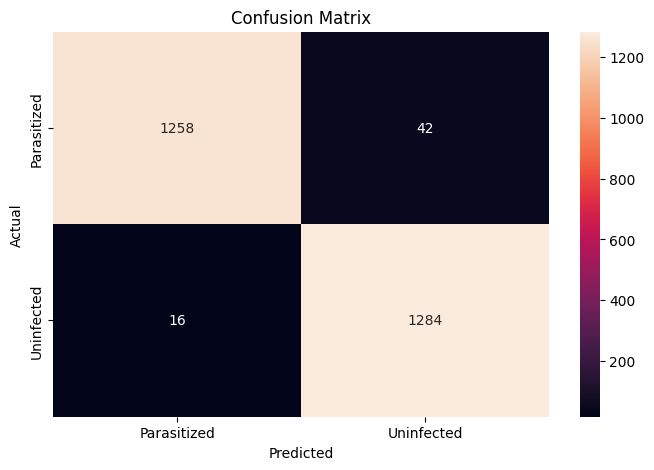

In [46]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_encoded, y_pred_test_classes))
cm = confusion_matrix(y_test_encoded, y_pred_test_classes)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');
plt.show()

<b>Plotting the train and validation curves

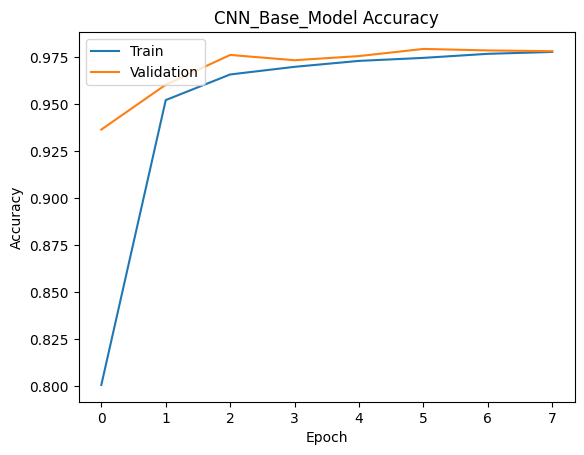

In [47]:
plt.plot(history_modelbase_modified.history['accuracy'])
plt.plot(history_modelbase_modified.history['val_accuracy'])
plt.title('CNN_Base_Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()


###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [48]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [49]:
#the new model will containe a convolutional layer with 32 filters, and a second convolutional layer with 64 filters
model1= Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(1, activation = "sigmoid")) # 2 represents output layer neurons



###<b> Compiling the model

In [50]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b> Using Callbacks

In [52]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('/mdl_1_modified.hdf5', monitor = 'val_loss',verbose = 1, save_best_only = True)]

<b>Fit and Train the model

In [53]:
history_model1 = model1.fit(X_trainNew_normalized, y_train_encoded, batch_size = 32,callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.3349 - accuracy: 0.8386
Epoch 1: val_loss improved from inf to 0.10729, saving model to /mdl_1_modified.hdf5
624/624 [==============================] - 20s 30ms/step - loss: 0.3349 - accuracy: 0.8386 - val_loss: 0.1073 - val_accuracy: 0.9655
Epoch 2/20
623/624 [============================>.] - ETA: 0s - loss: 0.1143 - accuracy: 0.9656
Epoch 2: val_loss improved from 0.10729 to 0.09341, saving model to /mdl_1_modified.hdf5
624/624 [==============================] - 18s 29ms/step - loss: 0.1142 - accuracy: 0.9656 - val_loss: 0.0934 - val_accuracy: 0.9702
Epoch 3/20
623/624 [============================>.] - ETA: 0s - loss: 0.0941 - accuracy: 0.9712
Epoch 3: val_loss improved from 0.09341 to 0.07668, saving model to /mdl_1_modified.hdf5
624/624 [==============================] - 18s 29ms/step - loss: 0.0940 - accuracy: 0.9712 - val_loss: 0.0767 - val_accuracy: 0.9766
Epoch 4/20
623/624 [============================>.

In [ ]:
model1.save(parent_dir +'/model1_addlayers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###<b> Evaluating the model

In [54]:
test_loss, test_acc = model1.evaluate(X_testNew_normalized, y_test_encoded, verbose=2)

82/82 - 1s - loss: 0.0559 - accuracy: 0.9819 - 636ms/epoch - 8ms/step


<b> Plotting the confusion matrix

In [ ]:
#basic_cnn = tf.keras.models.load_model('./basic_cnn.h5')

model1_cnn = tf.keras.models.load_model('/model1_addlayers.h5')
#vgg_ft = tf.keras.models.load_model('.h5')
model1_cnn

In [55]:
y_pred_test_m1 = model1.predict(X_testNew_normalized)
y_pred_test_classes_m1 = (y_pred_test_m1>0.5).astype('int32')

82/82 [==============================] - 1s 6ms/step


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



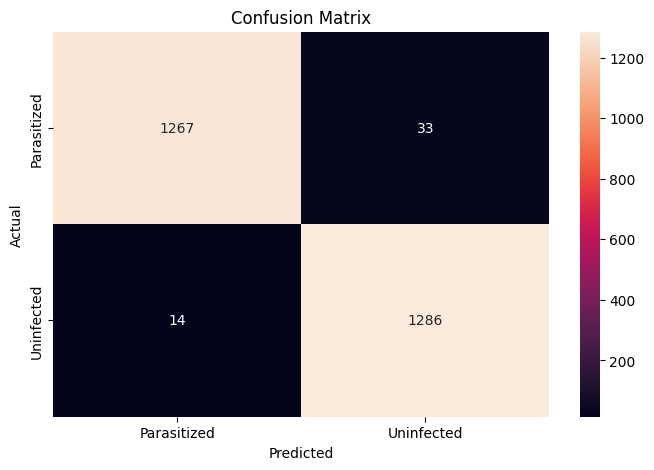

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_encoded, y_pred_test_classes_m1))
cm = confusion_matrix(y_test_encoded, y_pred_test_classes_m1)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');
plt.show()

<b> Plotting the train and the validation curves

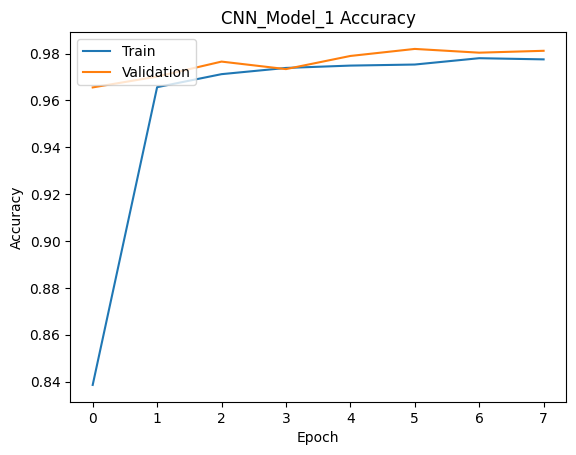

In [57]:
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('CNN_Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

###<b> Model 2 with Batch Normalization

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
model2= Sequential()

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2.add(LeakyReLU(alpha=0.01))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(alpha=0.01))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(alpha=0.01))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.01))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(alpha=0.01))

model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(1, activation = "sigmoid")) # 2 represents output layer neurons



###<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                      

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('/mdl_2_modified.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)]

<b>Fit and train the model

In [ ]:
history_model2 = model2.fit(X_trainNew_normalized, y_train_encoded, batch_size = 32,callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
618/624 [============================>.] - ETA: 0s - loss: 0.4471 - accuracy: 0.7932
Epoch 1: val_loss improved from inf to 0.49800, saving model to /mdl_2_modified.hdf5
624/624 [==============================] - 10s 10ms/step - loss: 0.4452 - accuracy: 0.7946 - val_loss: 0.4980 - val_accuracy: 0.8454
Epoch 2/20
624/624 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.9526
Epoch 2: val_loss improved from 0.49800 to 0.14233, saving model to /mdl_2_modified.hdf5
624/624 [==============================] - 5s 8ms/step - loss: 0.1463 - accuracy: 0.9526 - val_loss: 0.1423 - val_accuracy: 0.9547
Epoch 3/20
624/624 [==============================] - ETA: 0s - loss: 0.1194 - accuracy: 0.9629
Epoch 3: val_loss did not improve from 0.14233
624/624 [==============================] - 5s 8ms/step - loss: 0.1194 - accuracy: 0.9629 - val_loss: 0.1511 - val_accuracy: 0.9575
Epoch 4/20
623/624 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9684


In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/'+'batchNorm.h5')

<b>Plotting the train and validation accuracy

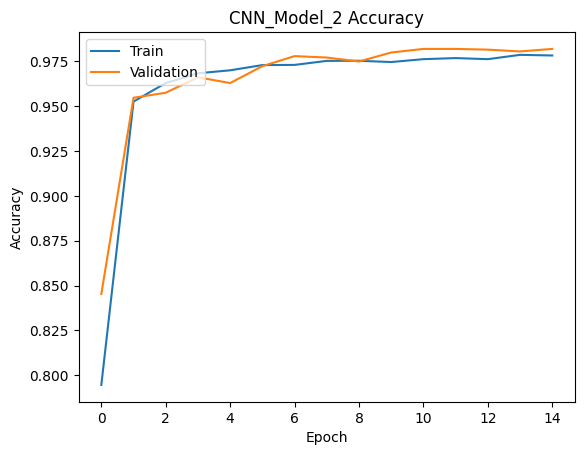

In [ ]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('CNN_Model_2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

###<b>Evaluating the model

In [ ]:
test_loss, test_acc = model2.evaluate(X_testNew_normalized, y_test_encoded, verbose=2)

82/82 - 1s - loss: 0.0507 - accuracy: 0.9838 - 532ms/epoch - 6ms/step


<b> Generate the classification report and confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



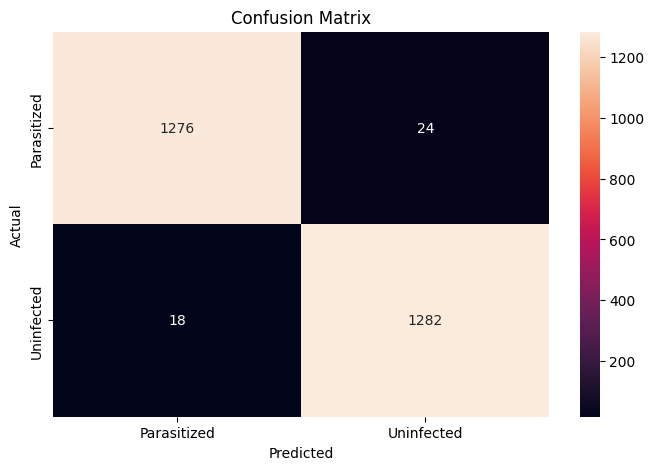

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_test_m2 = model2.predict(X_testNew_normalized)
y_pred_test_classes_m2 = (y_pred_test_m2>0.5).astype('int32')

print(classification_report(y_test_encoded, y_pred_test_classes_m2))
cm = confusion_matrix(y_test_encoded, y_pred_test_classes_m2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');
plt.show()

###<b>Model 3 with Data Augmentation

In [228]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

###<b> Use image data generator

In [209]:
BATCH_SIZE = 128
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(resized_all_train_fromDF, train_labels, test_size = 0.2, random_state = 42)




train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip = True, zoom_range = 0.5, rotation_range = 30)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# build image augmentation generators
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size = (64,64),shuffle=True)
validation_generator = test_datagen.flow_from_directory(test_dir, batch_size=BATCH_SIZE, target_size = (64,64),shuffle=True)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [229]:
BATCH_SIZE = 64
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(resized_all_train_fromDF, train_labels, test_size = 0.2, random_state = 42)




train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip = True, zoom_range = 0.5, rotation_range = 30)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# build image augmentation generators
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = BATCH_SIZE, seed = 42, shuffle = True)
validation_generator = test_datagen.flow(x = X_val, y = y_val, batch_size = BATCH_SIZE, seed = 42, shuffle = True)

#train_generator = train_datagen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size = (64,64),shuffle=True)
#validation_generator = test_datagen.flow_from_directory(test_dir, batch_size=BATCH_SIZE, target_size = (64,64),shuffle=True)

####<B>Visualizing Augmented images

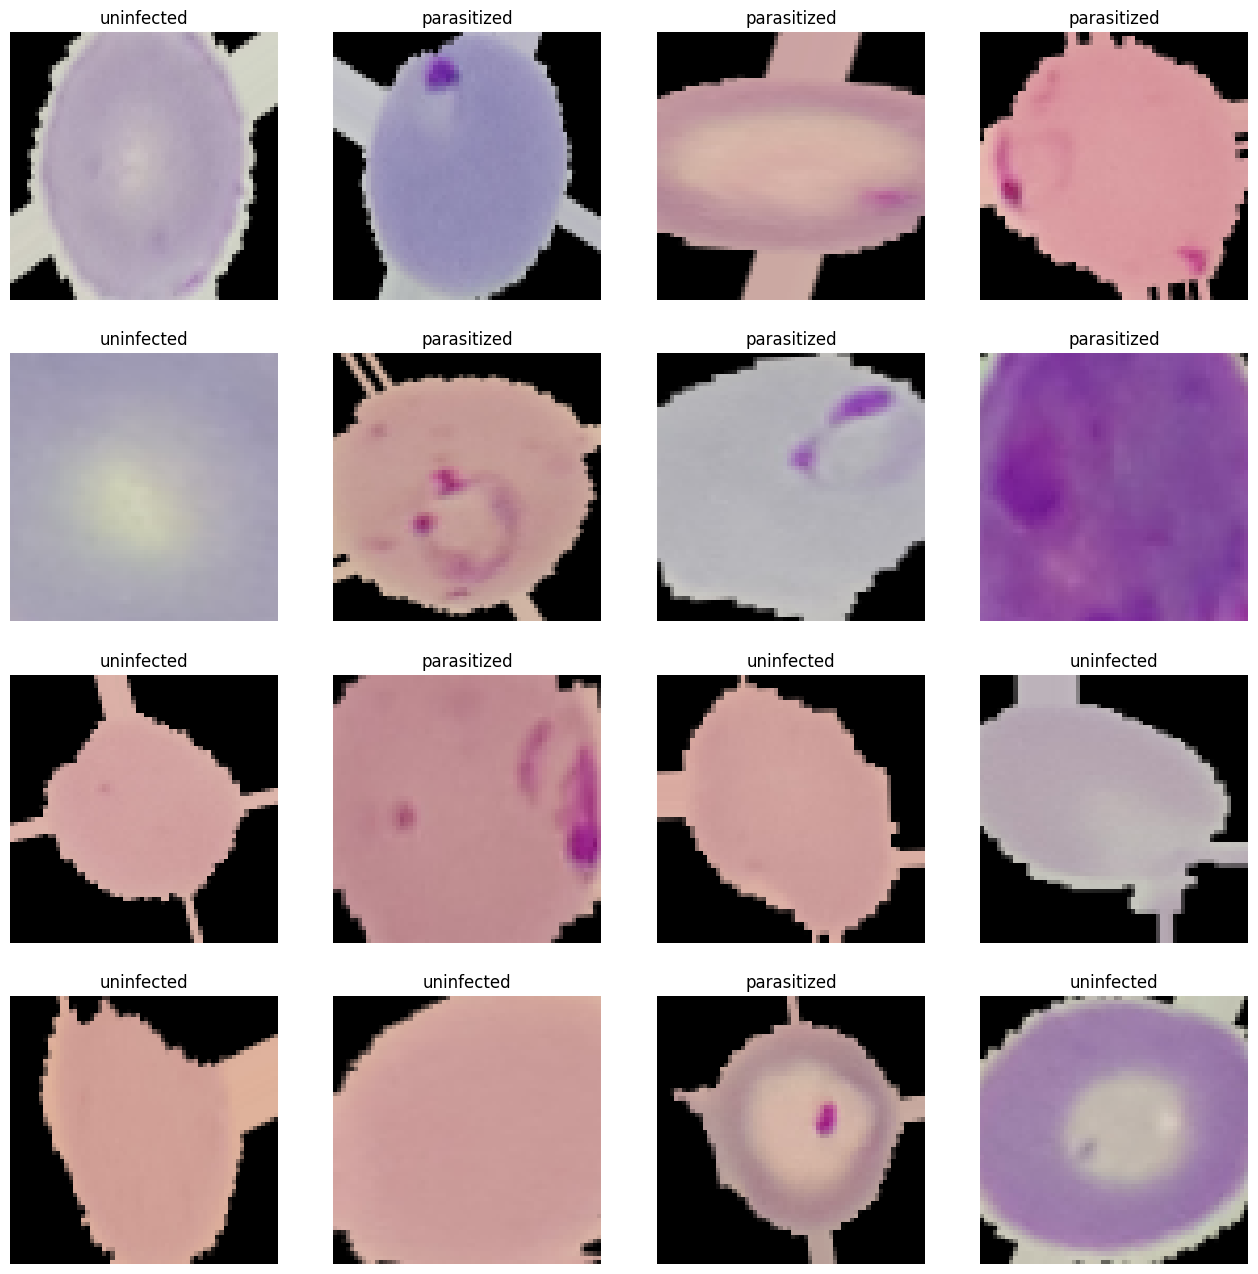

In [61]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if np.argmax(label) == 1:
        ax.set_title('uninfected')
    else:
        ax.set_title('parasitized')
    ax.axis('off')

###<b>Building the Model

In [230]:
#modified
model3= Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same",activation = 'relu', input_shape = (64, 64, 3)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same",activation = 'relu'))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same",activation = 'relu'))

model3.add(MaxPooling2D(pool_size = 2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), padding='same',activation = 'relu'))


model3.add(MaxPooling2D((2, 2)))
model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512,activation = 'relu'))

model3.add(Dropout(0.4))
model3.add(BatchNormalization())

model3.add(Dense(1, activation = "sigmoid")) # 2 represents output layer neurons



In [ ]:
model3.save('/content/drive/MyDrive/Colab Notebooks/'+'dataAugMdl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<b>Using Callbacks

In [231]:
#modified
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('.mdl_3_modified.hdf5', monitor = 'val_loss', verbose = 1,save_best_only = True)]

In [232]:
#modified'
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b> Fit and Train the model

In [120]:
testX, testY = validation_generator.next()

In [214]:
##NEW MODIFIED
history_model3 = model3.fit(train_generator,
                              validation_data=validation_generator,
                              verbose=1,
                              callbacks=callbacks,
                              epochs=20)

Epoch 1/20
195/195 [==============================] - ETA: 0s - loss: 0.7288 - accuracy: 0.6119
Epoch 1: val_loss improved from inf to 0.78239, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 291s 692ms/step - loss: 0.7288 - accuracy: 0.6119 - val_loss: 0.7824 - val_accuracy: 0.5000
Epoch 2/20
195/195 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8225
Epoch 2: val_loss improved from 0.78239 to 0.62370, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 132s 678ms/step - loss: 0.3985 - accuracy: 0.8225 - val_loss: 0.6237 - val_accuracy: 0.6815
Epoch 3/20
195/195 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9230
Epoch 3: val_loss improved from 0.62370 to 0.23103, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 131s 673ms/step - loss: 0.2128 - accuracy: 0.9230 - val_loss: 0.2310 - val_accuracy: 0.9019
Epoch 4/20
195/195 [========================

In [241]:
import re
import nltk
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 10000
max_len = 25

tokenizer = Tokenizer(num_words=vocab_size)

tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
x_train_new = pad_sequences(sequences, maxlen=max_len)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [236]:
##3rd MODIFIED
history_model3 = model3.fit(train_generator,
                              validation_data=validation_generator,
                              verbose=1,
                              callbacks=callbacks,
                              epochs=20)

Epoch 1/20


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-233-69f57ac61f1d>", line 2, in <cell line: 2>
      history_model3 = model3.fit(train_generator,
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_157472]

In [234]:
print(validation_generator)

In [227]:
testX, testY = validation_generator.next()
print(testX.shape, testY.shape)

(64, 64, 64, 3) (64,)


In [121]:
#add:
history_model3 = model3.fit(train_generator,
                              validation_data=(testX, testY),
                              verbose=1,
                              callbacks=callbacks,
                              epochs=20)

Epoch 1/20
195/195 [==============================] - ETA: 0s - loss: 0.7214 - accuracy: 0.6244
Epoch 1: val_loss improved from inf to 0.88753, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 125s 630ms/step - loss: 0.7214 - accuracy: 0.6244 - val_loss: 0.8875 - val_accuracy: 0.5312
Epoch 2/20
195/195 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8582
Epoch 2: val_loss improved from 0.88753 to 0.41595, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 123s 632ms/step - loss: 0.3403 - accuracy: 0.8582 - val_loss: 0.4160 - val_accuracy: 0.7734
Epoch 3/20
195/195 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9248
Epoch 3: val_loss improved from 0.41595 to 0.13081, saving model to .mdl_3_modified.hdf5
195/195 [==============================] - 122s 627ms/step - loss: 0.2139 - accuracy: 0.9248 - val_loss: 0.1308 - val_accuracy: 0.9375
Epoch 4/20
195/195 [========================

###<B>Evaluating the model

In [70]:
#modified version
test_loss, test_acc = model3.evaluate(X_testNew_normalized, y_test_encoded, verbose=2)


82/82 - 1s - loss: 0.6952 - accuracy: 0.5000 - 723ms/epoch - 9ms/step


In [215]:
model3.evaluate(validation_generator)

21/21 [==============================] - 10s 464ms/step - loss: 0.1037 - accuracy: 0.9638


[0.10371655970811844, 0.9638461470603943]

<b>Plot the train and validation accuracy

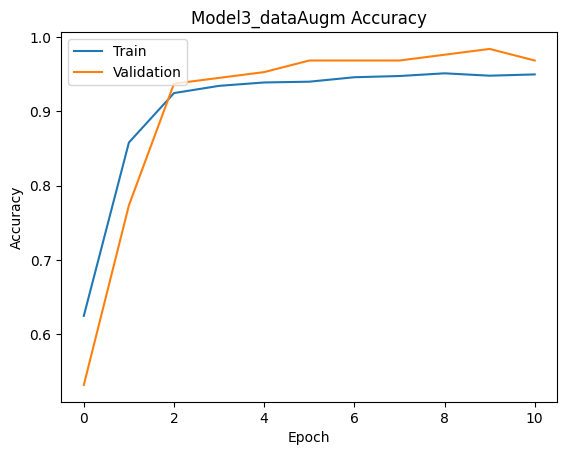

In [129]:
plt.plot(history_model3.history['accuracy'])
plt.plot(history_model3.history['val_accuracy'])
plt.title('Model3_dataAugm Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

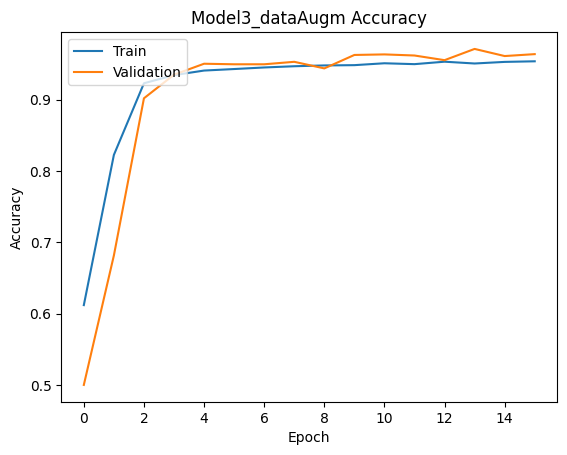

In [217]:
plt.plot(history_model3.history['accuracy'])
plt.plot(history_model3.history['val_accuracy'])
plt.title('Model3_dataAugm Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

<B>Plotting the classification report and confusion matrix

In [218]:
# Making predictions on the test data
y_pred_test = model3.predict(X_testNew_normalized)

# Converting probabilities to class labels
y_pred_test_classes= np.argmax(y_pred_test, axis = 1)

y_true = np.argmax(y_test_encoded, axis = 1)

82/82 [==============================] - 1s 8ms/step


              precision    recall  f1-score   support

           0       0.73      0.27      0.40      1300
           1       0.55      0.90      0.68      1300

    accuracy                           0.58      2600
   macro avg       0.64      0.58      0.54      2600
weighted avg       0.64      0.58      0.54      2600



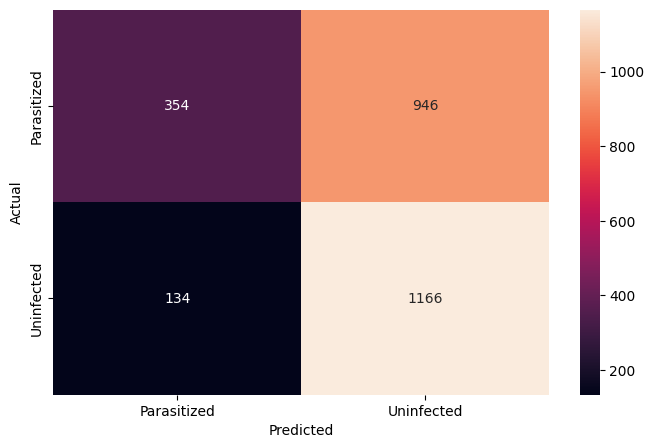

In [220]:
# Importing required functions
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_encoded, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [74]:
from keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
vgg_model = VGG16(input_shape = (64, 64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [76]:
transfer_layer = vgg_model.get_layer('block5_pool')

vgg_model.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(1, activation = 'sigmoid')(x)

model4 = Model(vgg_model.input, pred) # Initializing the model

model4.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['acc'])

###<b>Compiling the model

In [77]:
model4.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['acc'])

<b>Fit and Train the model

In [78]:

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('/mdl_vgg_modified.hdf5', monitor = 'val_loss', save_best_only = True)]
#vgghist = model.fit(train_generator, validation_data = validation_generator, callbacks = callbacks, verbose = 1, steps_per_epoch = 100, epochs = 10)

vggmodl4hist = model4.fit(X_trainNew_normalized, y_train_encoded,callbacks = callbacks,batch_size = 32, validation_split=0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 82s 130ms/step - loss: 0.4712 - acc: 0.7800 - val_loss: 0.5260 - val_acc: 0.7181
Epoch 2/20
624/624 [==============================] - 78s 125ms/step - loss: 0.4244 - acc: 0.8074 - val_loss: 0.4403 - val_acc: 0.7841
Epoch 3/20
624/624 [==============================] - 79s 127ms/step - loss: 0.4017 - acc: 0.8176 - val_loss: 0.4050 - val_acc: 0.8151
Epoch 4/20
624/624 [==============================] - 77s 123ms/step - loss: 0.4064 - acc: 0.8152 - val_loss: 0.3922 - val_acc: 0.8159
Epoch 5/20
624/624 [==============================] - 75s 120ms/step - loss: 0.4062 - acc: 0.8136 - val_loss: 0.3803 - val_acc: 0.8255
Epoch 6/20
624/624 [==============================] - 81s 130ms/step - loss: 0.4068 - acc: 0.8042 - val_loss: 0.3737 - val_acc: 0.8335
Epoch 7/20
624/624 [==============================] - 74s 119ms/step - loss: 0.4144 - acc: 0.7993 - val_loss: 0.3937 - val_acc: 0.8295
Epoch 8/20
624/624 [==============================] - 7

<b>Plot the train and validation accuracy

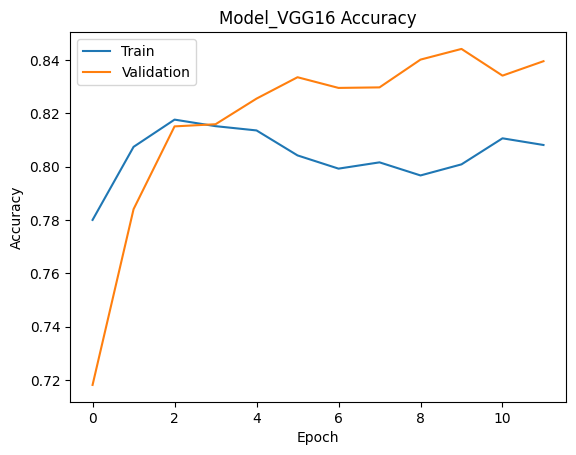

In [79]:

plt.plot(vggmodl4hist.history['acc'])
plt.plot(vggmodl4hist.history['val_acc'])
plt.title('Model_VGG16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

###<b> Evaluating the model

In [80]:

test_loss, test_acc = model4.evaluate(X_testNew_normalized, y_test_encoded, verbose=2)


82/82 - 8s - loss: 0.4080 - acc: 0.8058 - 8s/epoch - 94ms/step


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 8s 93ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1300
           1       0.83      0.77      0.80      1300

    accuracy                           0.81      2600
   macro avg       0.81      0.81      0.81      2600
weighted avg       0.81      0.81      0.81      2600



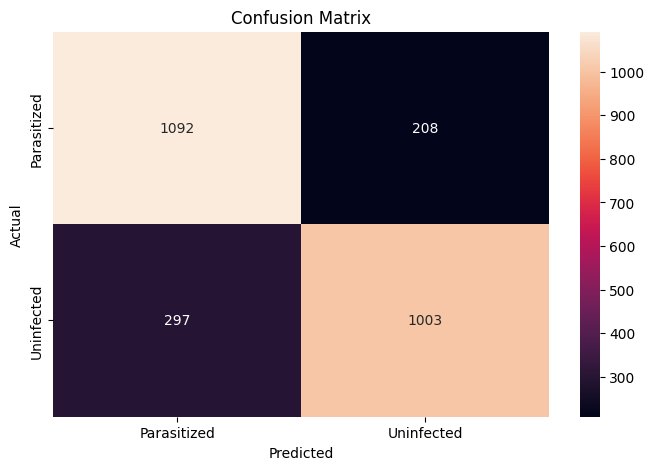

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_test_m2 = model4.predict(X_testNew_normalized)
y_pred_test_classes_m2 = (y_pred_test_m2>0.5).astype('int32')

print(classification_report(y_test_encoded, y_pred_test_classes_m2))
cm = confusion_matrix(y_test_encoded, y_pred_test_classes_m2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = ['Parasitized','Uninfected'], yticklabels = ['Parasitized','Uninfected'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix');
plt.show()